# Proyecto Final  Despliegue de Proyecto en la Nube con Métricas y Presentación Pitch (Core)

Quise realizar este Core como continuación del proyecto 2 parte II


- Descripción:

En esta actividad final, deberás desplegar el proyecto que has desarrollado en la nube, utilizando alguna plataforma como Google Cloud Platform (GCP), Amazon Web Services (AWS) o Microsoft Azure. El despliegue debe incluir métricas relevantes del modelo, visualizaciones de resultados y una presentación tipo pitch de máximo 5 minutos.

- Objetivo:

El objetivo es que implementes todo el flujo de trabajo del proyecto en la nube, desde el entrenamiento hasta el despliegue del modelo, y presentes los resultados de manera clara y profesional.

# 1. Selección de la nube y configuración:

  – Elige la plataforma en la nube que utilizarás para desplegar tu proyecto (GCP, AWS o Azure).
  
  – Configura una instancia virtual o utiliza servicios como Google AI Platform, Amazon SageMaker o Azure Machine Learning para entrenar y desplegar tu modelo.

# 2. Entrenamiento y despliegue del modelo:

  – Si aún no lo has hecho, entrena tu modelo final utilizando los datos y técnicas que seleccionaste durante el desarrollo del proyecto.

  – Despliega el modelo en la nube, asegurándote de que sea accesible a través de una API o una interfaz web. Puedes utilizar Flask o FastAPI para crear una interfaz sencilla.


### Dataset seleccionado:
Seleccioné el archivo de satisfaction

https://www.kaggle.com/datasets/pooriamst/online-shopping/data

En el archivo 6_(Core)_Proyecto_2_Parte_I_Alexander_Marín.ipynb corresponde al df_satisfaction

In [1]:
# Instalar la API de Kaggle
!pip install kaggle

# Crear el directorio para las credenciales de Kaggle
!mkdir -p ~/.kaggle

In [2]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d pooriamst/online-shopping
!unzip online-shopping.zip

Dataset URL: https://www.kaggle.com/datasets/pooriamst/online-shopping
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/6.96k [00:00<?, ?B/s]
100% 6.96k/6.96k [00:00<00:00, 10.3MB/s]
Archive:  online-shopping.zip
  inflating: AI in Retail Dataset.csv  


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lee el archivo CSV
df = pd.read_csv('/content/AI in Retail Dataset.csv', encoding='latin-1')

In [35]:
print(df.info())
print("\n")
print(df.describe(include='all').round(2))
print("\n")
print("Valores nulos:")
print(df.isnull().sum() * 100 / len(df))
print("\n")
print("Valores duplicados:")
print(df.duplicated().sum())
print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Country                           656 non-null    object
 1   Online_Consumer                   656 non-null    object
 2   Age                               656 non-null    object
 3   Annual_Salary                     656 non-null    object
 4   Gender                            656 non-null    object
 5   Education                         656 non-null    object
 6   Payment_Method_Credit/Debit       656 non-null    object
 7   Living_Region                     656 non-null    object
 8   Online_Service_Preference         656 non-null    object
 9   AI_Endorsement                    656 non-null    object
 10  AI_Privacy_No_Trust               656 non-null    object
 11  AI_Enhance_Experience             656 non-null    object
 12  AI_Satisfication      

In [36]:
def uniq (df):
    df=pd.DataFrame([[i,df[i].unique(),df[i].dtype,len(df[i].unique())]for i in df.columns],columns=['feature','val','types','len']).set_index('feature')
    return df

uniq(df)

,val,types,len
feature,,,
Country,"[INDIA, CHINA, CANADA]",object,3
Online_Consumer,"[YES, NO]",object,2
Age,"[Gen X, Gen Z, Millennials, Baby Boomers]",object,4
Annual_Salary,"[Medium High, Low, High, Medium]",object,4
Gender,"[Female, Male, Prefer not to say]",object,3
Education,"[Masters Degree, University Graduate, Highsch...",object,4
Payment_Method_Credit/Debit,"[NO, YES]",object,2
Living_Region,"[Metropolitan, Rural Areas, Suburban Areas]",object,3
Online_Service_Preference,"[NO, YES]",object,2


In [61]:
print(df['Education'].unique())


['Masters\x92 Degree' 'University Graduate' 'Highschool Graduate'
 'Doctorate Degree']


In [66]:
print(df['AI_Satisfication'].unique())


['Satisfied' 'Unsatisfied']


In [37]:
def unique_and_count(df, column_name):

  if column_name not in df.columns:
    print(f"Error: Column '{column_name}' not found in DataFrame.")
    return None

  unique_values = df[column_name].unique()
  value_counts = df[column_name].value_counts()

  result = {
      'unique_values': unique_values,
      'value_counts': value_counts
  }

  return result

unique_and_count(df, 'AI_Satisfication')

{'unique_values': array(['Satisfied', 'Unsatisfied'], dtype=object),
 'value_counts': AI_Satisfication
 Satisfied      537
 Unsatisfied    119
 Name: count, dtype: int64}

In [38]:
# Cramer para mirar asocición entre variables respecto a la objetivo
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(var1, var2):
    crosstab = pd.crosstab(var1, var2)
    chi2 = chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    min_dim = min(crosstab.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

# Seleccionar todas las columnas categóricas excepto la variable objetivo
target_col = 'AI_Satisfication'
categorical_cols = df.select_dtypes(include=['object','int','float']).columns
other_cols = [col for col in categorical_cols if col != target_col]

# Calcular V de Cramer para cada columna con respecto a AI_Satisfication
cramer_scores = {}
for col in other_cols:
    cramer_scores[col] = cramers_v(df[target_col], df[col])

# Convertir a Series y ordenar
cramer_results = pd.Series(cramer_scores).sort_values(ascending=False)

print(f"\nAsociaciones con {target_col} usando V de Cramer:")
print(cramer_results)

# V de Cramer: medida estadística evalúa fuerza de asociación entre variables categóricas, basada en estadística chi-cuadrado.
# Sus valores van de 0 a 1, donde: 0 significa que no hay asociación, 1 significa una asociación perfecta…
# < 0.1: asociación muy débil, 0.1 - 0.3: asociación débil, 0.3 - 0.5: asociación moderada, >0.5: asociación fuerte

# La ventaja del V de Cramer es que:
# Funciona con variables categóricas de cualquier número de categorías
# Es simétrica (el orden de las variables no importa)
# Es normalizada (siempre va de 0 a 1)
# No asume ninguna distribución específica de los datos


Asociaciones con AI_Satisfication usando V de Cramer:
AI_Enhance_Experience               0.470118
Online_Service_Preference           0.328724
Education                           0.206223
Country                             0.165051
Product_Category_Groceries          0.149070
AI_Privacy_No_Trust                 0.138650
Age                                 0.130263
Product_Category_Clothing           0.130113
Payment_Method_Ewallet              0.127730
Annual_Salary                       0.114793
AI_Endorsement                      0.109133
AI_Tools_Used_Voice&Photo_Search    0.088382
Living_Region                       0.070235
Payment_Method_Credit/Debit         0.053039
AI_Tools_Used _Chatbots             0.050676
Product_Category_Appliances         0.040994
Product_Category_Electronics        0.040592
Gender                              0.039655
Online_Consumer                     0.037990
Product_Category_Personal_Care      0.035949
AI_Tools_Used_Virtual_Assistant     0.010940


In [41]:
# No hay nulos, ni outliers, ni corregir valores en variables categóricas, tratar solo duplicados
df.drop_duplicates(inplace=True)

print("\nValores duplicados después de eliminarlos:")
print(df.duplicated().sum())


Valores duplicados después de eliminarlos:
0


In [42]:
# ESTE CÓDIGO SE CORRE LA SEGUNDA VEZ, PRIMERO SE REVISÓ CON TODAS LAS CARACTERÍSTICAS Y LUEGO CON AQUELLAS CON CORRELACIÓN SUPERIOR AL 10%

# Define the threshold for correlation
threshold = 0.15

# Filter the Cramer's V results based on the threshold
selected_columns = cramer_results[cramer_results > threshold].index

# Select the columns from the DataFrame
df_selected = df[selected_columns]
df_selected['AI_Satisfication'] = df['AI_Satisfication']

# Print or further process the selected columns
print("\nSelected columns based on Cramer's V > 0.1:")
print(df_selected)


Selected columns based on Cramer's V > 0.1:
    AI_Enhance_Experience Online_Service_Preference            Education  \
0                     YES                        NO      Masters Degree   
1                     YES                        NO  University Graduate   
2                     YES                       YES  University Graduate   
3                     YES                       YES  University Graduate   
4                     YES                       YES  University Graduate   
..                    ...                       ...                  ...   
650                   YES                       YES      Masters Degree   
651                   YES                       YES  Highschool Graduate   
653                   YES                       YES  University Graduate   
654                   YES                        NO  Highschool Graduate   
655                   YES                       YES  University Graduate   

    Country AI_Satisfication  
0     INDIA

<ipython-input-42-d890470fd2c0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['AI_Satisfication'] = df['AI_Satisfication']


In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder

#df_le = df.copy()
df_le = df_selected.copy()

# Columna a excluir
exclude_column = 'AI_Satisfication'

# Función para aplicar LabelEncoder
def apply_label_encoder(column):
    encoder = LabelEncoder()
    return encoder.fit_transform(column)

# Crear ColumnTransformer
transformer = ColumnTransformer(
    transformers=[
        ('label_encoder', FunctionTransformer(lambda x: x.apply(apply_label_encoder, axis=0)),
         [col for col in df_le.columns if col != exclude_column])  # Aplicar a todas menos la excluida
    ],
    remainder='passthrough'  # Dejar la columna excluida sin modificar
)

# Aplicar el ColumnTransformer
transformed_array = transformer.fit_transform(df_le)

# Crear un DataFrame con los nombres originales de las columnas
transformed_columns = [col for col in df_le.columns if col != exclude_column] + [exclude_column]
df_le_f = pd.DataFrame(transformed_array, columns=transformed_columns)

print(df_le_f)

    AI_Enhance_Experience Online_Service_Preference Education Country  \
0                       1                         0         2       2   
1                       1                         0         3       2   
2                       1                         1         3       2   
3                       1                         1         3       2   
4                       1                         1         3       2   
..                    ...                       ...       ...     ...   
643                     1                         1         2       0   
644                     1                         1         1       0   
645                     1                         1         3       0   
646                     1                         0         1       0   
647                     1                         1         3       0   

    AI_Satisfication  
0          Satisfied  
1          Satisfied  
2          Satisfied  
3          Satisfied  
4       

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

#df_le = df.copy()
df_le = df_selected.copy()

# Columna a excluir
exclude_column = 'AI_Satisfication'

# Función para aplicar LabelEncoder
def apply_label_encoder(column):
    encoder = LabelEncoder()
    return encoder.fit_transform(column)

# Crear el ColumnTransformer
transformer = ColumnTransformer(
    transformers=[
        ('label_encoder', FunctionTransformer(lambda x: x.apply(apply_label_encoder, axis=0)),
         [col for col in df_le.columns if col != exclude_column])  # Aplicar a todas menos la excluida
    ],
    remainder='passthrough'  # Dejar la columna excluida sin modificar
)

# Crear un pipeline
pipeline = Pipeline([
    ('preprocessor', transformer)  # Paso de preprocesamiento
])

# Ajustar y transformar los datos
transformed_array = pipeline.fit_transform(df_le)

# Crear un DataFrame con los nombres originales de las columnas
transformed_columns = [col for col in df_le.columns if col != exclude_column] + [exclude_column]
df_le_f = pd.DataFrame(transformed_array, columns=transformed_columns)

print(df_le_f)


    AI_Enhance_Experience Online_Service_Preference Education Country  \
0                       1                         0         2       2   
1                       1                         0         3       2   
2                       1                         1         3       2   
3                       1                         1         3       2   
4                       1                         1         3       2   
..                    ...                       ...       ...     ...   
643                     1                         1         2       0   
644                     1                         1         1       0   
645                     1                         1         3       0   
646                     1                         0         1       0   
647                     1                         1         3       0   

    AI_Satisfication  
0          Satisfied  
1          Satisfied  
2          Satisfied  
3          Satisfied  
4       

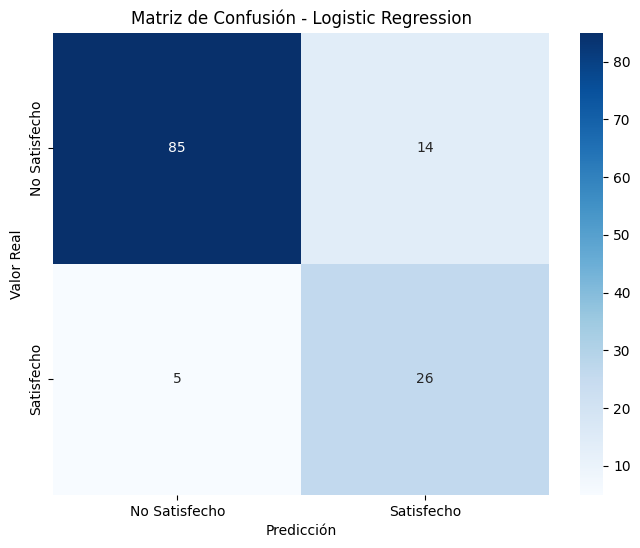


Resultados detallados para Logistic Regression:
Verdaderos Negativos (TN): 85
Falsos Positivos (FP): 14
Falsos Negativos (FN): 5
Verdaderos Positivos (TP): 26

Resumen de métricas para todos los modelos:
                 Model  Accuracy  Cross-Validation Accuracy  Precision  \
0  Logistic Regression  0.853846                   0.787435       0.65   

    Recall  F1-Score   ROC-AUC  
0  0.83871  0.732394  0.850114  


In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Asumimos que ya hemos aplicado LabelEncoder o OneHotEncoder y preprocesado los datos
X = df_le_f.drop(columns='AI_Satisfication')  # Variables predictoras
y = df_le_f['AI_Satisfication']  # Variable dependiente

# Codificar las etiquetas categóricas de y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Separar en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Modelos a entrenar
models = [
    ('Logistic Regression', LogisticRegression(max_iter=200,class_weight='balanced', random_state=42))
]

# Función para plotear matriz de confusión
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Satisfecho', 'Satisfecho'],
                yticklabels=['No Satisfecho', 'Satisfecho'])
    plt.title(f'Matriz de Confusión - {title}')
    plt.ylabel('Valor Real')
    plt.xlabel('Predicción')
    plt.show()

# Evaluar los modelos
results = []
for name, model in models:
    # Realizar validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    # Entrenar el modelo en el conjunto completo de entrenamiento
    model.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_cv = cv_scores.mean()
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Calcular y mostrar matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(conf_matrix, name)

    # Imprimir valores de la matriz de confusión
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print(f"\nResultados detallados para {name}:")
    print(f"Verdaderos Negativos (TN): {tn}")
    print(f"Falsos Positivos (FP): {fp}")
    print(f"Falsos Negativos (FN): {fn}")
    print(f"Verdaderos Positivos (TP): {tp}")

    # Almacenar resultados
    results.append((name, accuracy, accuracy_cv, precision, recall, f1, roc_auc))

# Crear DataFrame con los resultados
results_df_le = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Cross-Validation Accuracy',
                                             'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

# Mostrar los resultados generales
print("\nResumen de métricas para todos los modelos:")
print(results_df_le)

In [46]:
print(type(results_df_le))

<class 'pandas.core.frame.DataFrame'>


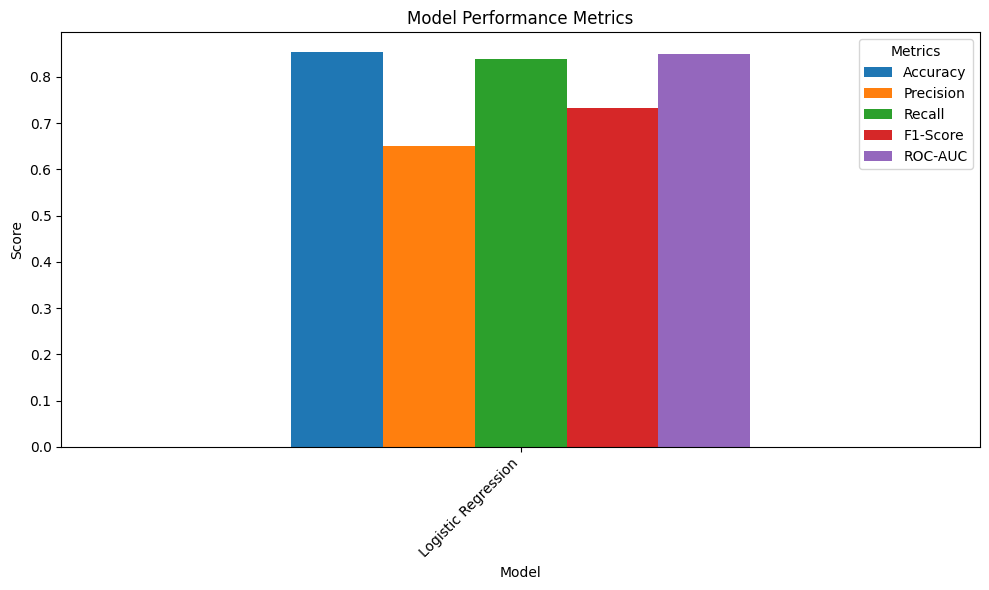

In [50]:
# Select the metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

# Create the bar plot
ax = results_df_le.plot(x='Model', y=metrics, kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Model Performance Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Metrics')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

plt.show()


In [55]:
!pip install optuna

In [56]:
!pip install --quiet optuna

In [57]:
import optuna
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Definir el espacio de búsqueda
    params = {
        'C': trial.suggest_float('C', 1e-4, 1e2, log=True),
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),
        'solver': trial.suggest_categorical('solver', ['liblinear', 'saga']),
        'max_iter': trial.suggest_int('max_iter', 200, 1000),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', None])
    }

    # Crear y entrenar el modelo
    model = LogisticRegression(**params)

    # Usar validación cruzada para evaluar
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')

    return scores.mean()

# Crear el estudio de Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Obtener los mejores parámetros
best_params = study.best_params
print("Mejores parámetros encontrados:")
print(best_params)
print("\nMejor puntuación:", study.best_value)

# Entrenar el modelo final con los mejores parámetros
final_model = LogisticRegression(**best_params)
final_model.fit(X_train, y_train)

# Evaluar en el conjunto de prueba
y_pred_optuna = final_model.predict(X_test)
print("\nRendimiento en conjunto de prueba:")
print(f"F1 Score: {f1_score(y_test, y_pred_optuna)}")

[I 2025-02-17 16:43:43,754] A new study created in memory with name: no-name-ca6f0343-7187-4e2c-9c8c-c932c04810df
[I 2025-02-17 16:43:43,817] Trial 0 finished with value: 0.0 and parameters: {'C': 0.003137026666353108, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 653, 'class_weight': None}. Best is trial 0 with value: 0.0.
[I 2025-02-17 16:43:43,860] Trial 1 finished with value: 0.0 and parameters: {'C': 0.0002860263020857062, 'penalty': 'l2', 'solver': 'saga', 'max_iter': 357, 'class_weight': None}. Best is trial 0 with value: 0.0.
[I 2025-02-17 16:43:43,905] Trial 2 finished with value: 0.0 and parameters: {'C': 0.003422733083418417, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 739, 'class_weight': None}. Best is trial 0 with value: 0.0.
[I 2025-02-17 16:43:43,974] Trial 3 finished with value: 0.41294581280788184 and parameters: {'C': 1.9716507169630286, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 970, 'class_weight': None}. Best is trial 3 with value: 0.4129458

Mejores parámetros encontrados:
{'C': 0.10841384011904326, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 459, 'class_weight': 'balanced'}

Mejor puntuación: 0.5618447018447018

Rendimiento en conjunto de prueba:
F1 Score: 0.6865671641791045


In [58]:
from sklearn.metrics import classification_report

# Crear diccionario con todos los modelos
models = {
    'Original': LogisticRegression().fit(X_train, y_train),
    'Optuna': final_model
}

# Comparar resultados
results_comparison = []

for name, model in models.items():
    # Predecir
    y_pred = model.predict(X_test)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results_comparison.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Crear DataFrame con resultados
comparison_df = pd.DataFrame(results_comparison)
print("Comparación de modelos:")
print(comparison_df)

# Mostrar reporte detallado para el mejor modelo
best_model_name = comparison_df.loc[comparison_df['F1-Score'].idxmax(), 'Model']
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

print(f"\nReporte detallado del mejor modelo ({best_model_name}):")
print(classification_report(y_test, y_pred_best))

Comparación de modelos:
      Model  Accuracy  Precision    Recall  F1-Score
0  Original  0.830769   0.736842  0.451613  0.560000
1    Optuna  0.838462   0.638889  0.741935  0.686567

Reporte detallado del mejor modelo (Optuna):
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        99
           1       0.64      0.74      0.69        31

    accuracy                           0.84       130
   macro avg       0.78      0.81      0.79       130
weighted avg       0.85      0.84      0.84       130



In [63]:
best_model = final_model

In [64]:
import joblib

# Guarda tu mejor modelo
joblib.dump(best_model, 'best_model.pkl')

# Descarga el archivo desde Colab a tu computadora
from google.colab import files
files.download('best_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
!pip install gradio

In [7]:
import gradio as gr
import joblib
import numpy as np

# Cargar el modelo
modelo_path = "best_model.pkl"
modelo = joblib.load(modelo_path)

# Opciones para los inputs
opciones_ai = ["YES", "NO"]
opciones_online = ["YES", "NO"]
opciones_education = ["Masters’ Degree", "University Graduate", "Highschool Graduate", "Doctorate Degree"]
opciones_country = ["INDIA", "CHINA", "CANADA"]

# Mapeo de categorías a números (si el modelo lo requiere)
def preprocess_input(ai_exp, online_pref, education, country):
    mapping = {
        "YES": 1, "NO": 0,
        "Masters’ Degree": 0, "University Graduate": 1, "Highschool Graduate": 2, "Doctorate Degree": 3,
        "INDIA": 0, "CHINA": 1, "CANADA": 2
    }
    return np.array([[mapping[ai_exp], mapping[online_pref], mapping[education], mapping[country]]])

# Función de predicción
def predecir_satisfaccion(ai_exp, online_pref, education, country):
    entrada = preprocess_input(ai_exp, online_pref, education, country)
    prediccion = modelo.predict(entrada)[0]  # 0 = Unsatisfied, 1 = Satisfied
    return "Satisfied" if prediccion == 1 else "Unsatisfied"

# Crear interfaz en Gradio
iface = gr.Interface(
    fn=predecir_satisfaccion,
    inputs=[
        gr.Dropdown(choices=opciones_ai, label="AI Enhance Experience"),
        gr.Dropdown(choices=opciones_online, label="Online Service Preference"),
        gr.Dropdown(choices=opciones_education, label="Education"),
        gr.Dropdown(choices=opciones_country, label="Country"),
    ],
    outputs=gr.Textbox(label="Predicted Satisfaction"),
    title="AI Satisfaction Prediction",
    description="Select the user attributes to predict their AI satisfaction level."
)

# Ejecutar la interfaz
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4c2ee4cf54a11cbb50.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [6]:
from google.colab import files

codigo = """import gradio as gr
import joblib
import numpy as np

# Cargar el modelo
modelo_path = "best_model.pkl"
modelo = joblib.load(modelo_path)

# Opciones para los inputs
opciones_ai = ["YES", "NO"]
opciones_online = ["YES", "NO"]
opciones_education = ["Masters’ Degree", "University Graduate", "Highschool Graduate", "Doctorate Degree"]
opciones_country = ["INDIA", "CHINA", "CANADA"]

# Mapeo de categorías a números (si el modelo lo requiere)
def preprocess_input(ai_exp, online_pref, education, country):
    mapping = {
        "YES": 1, "NO": 0,
        "Masters’ Degree": 0, "University Graduate": 1, "Highschool Graduate": 2, "Doctorate Degree": 3,
        "INDIA": 0, "CHINA": 1, "CANADA": 2
    }
    return np.array([[mapping[ai_exp], mapping[online_pref], mapping[education], mapping[country]]])

# Función de predicción
def predecir_satisfaccion(ai_exp, online_pref, education, country):
    entrada = preprocess_input(ai_exp, online_pref, education, country)
    prediccion = modelo.predict(entrada)[0]  # 0 = Unsatisfied, 1 = Satisfied
    return "Satisfied" if prediccion == 1 else "Unsatisfied"

# Crear interfaz en Gradio
iface = gr.Interface(
    fn=predecir_satisfaccion,
    inputs=[
        gr.Dropdown(choices=opciones_ai, label="AI Enhance Experience"),
        gr.Dropdown(choices=opciones_online, label="Online Service Preference"),
        gr.Dropdown(choices=opciones_education, label="Education"),
        gr.Dropdown(choices=opciones_country, label="Country"),
    ],
    outputs=gr.Textbox(label="Predicted Satisfaction"),
    title="AI Satisfaction Prediction",
    description="Select the user attributes to predict their AI satisfaction level."
)

# Ejecutar la interfaz
iface.launch()
"""

# Guardar el archivo en Colab
with open("app.py", "w") as f:
    f.write(codigo)

# Descargar el archivo a tu computadora
files.download("app.py")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import gradio as gr
import joblib
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Cargar el modelo
modelo_path = "best_model.pkl"
modelo = joblib.load(modelo_path)

# Datos de prueba (ejemplo)
y_true = [0, 1, 1, 0, 1]  # Reemplaza con tus datos reales
y_pred = [0, 1, 0, 0, 1]  # Reemplaza con las predicciones del modelo

# Calcular las métricas
accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Opciones para los inputs
opciones_ai = ["YES", "NO"]
opciones_online = ["YES", "NO"]
opciones_education = ["Masters’ Degree", "University Graduate", "Highschool Graduate", "Doctorate Degree"]
opciones_country = ["INDIA", "CHINA", "CANADA"]

# Función de predicción
def predecir_satisfaccion(ai_exp, online_pref, education, country):
    # Mapeo de las opciones seleccionadas
    mapping = {
        "YES": 1, "NO": 0,
        "Masters’ Degree": 0, "University Graduate": 1, "Highschool Graduate": 2, "Doctorate Degree": 3,
        "INDIA": 0, "CHINA": 1, "CANADA": 2
    }
    entrada = np.array([[mapping[ai_exp], mapping[online_pref], mapping[education], mapping[country]]])
    prediccion = modelo.predict(entrada)[0]  # 0 = Unsatisfied, 1 = Satisfied
    return "Satisfied" if prediccion == 1 else "Unsatisfied", f"Accuracy: {accuracy}", f"Recall: {recall}", f"F1 Score: {f1}"

# Crear interfaz en Gradio
iface = gr.Interface(
    fn=predecir_satisfaccion,
    inputs=[
        gr.Dropdown(choices=opciones_ai, label="AI Enhance Experience"),
        gr.Dropdown(choices=opciones_online, label="Online Service Preference"),
        gr.Dropdown(choices=opciones_education, label="Education"),
        gr.Dropdown(choices=opciones_country, label="Country"),
    ],
    outputs=[
        gr.Textbox(label="Predicted Satisfaction"),
        gr.Textbox(label="Accuracy"),
        gr.Textbox(label="Recall"),
        gr.Textbox(label="F1 Score")
    ],
    title="AI Satisfaction Prediction",
    description="Select the user attributes to predict their AI satisfaction level."
)

# Ejecutar la interfaz
iface.launch()